# 2021 TensorFlow 勉強用

## 手順(1) 「ans_studyInput_fork.txt」をアップロード

In [2]:
 # Colaboratoryでファイルをアップロード
 from google.colab import files
 uploaded = files.upload()

Saving ans_studyInput_qa.txt to ans_studyInput_qa.txt


In [3]:
import pandas as pd
df_study = pd.read_csv('ans_studyInput_qa.txt', names=['id', 'truth_val', 'ラベル（教師データ）', '入力'])
df_study

,id,truth_val,ラベル（教師データ）,入力
0,1,T,チャージ料金 1500円また、アルコール類を500円より提供しております。[こちら](htt...,料金はいくら？
1,2,T,"チャージ料金 1500円また,アルコール類を500円""より提供しております。[こちら](ht...",金額はどのくらいかかる？
2,3,T,チャージ料金 1500円また、アルコール類を500円より提供しております。[こちら](htt...,いくらあれば足りる？
3,x,T,チャージ料金 1500円また、アルコール類を500円より提供しております。[こちら](htt...,料金を教えてください
4,x,T,チャージ料金 1500円また、アルコール類を500円より提供しております。[こちら](htt...,料金について
...,...,...,...,...
171,x,T,もう秋ですね。まだ、天気良いので助かりますね。,秋はちょっと寒いですね。でも晴れてますね。
172,x,T,冬寒いですね。雨降っていますし、体にこたえます。,冬は寒いですね。しかも雨降ってます。
173,x,T,冬寒いですね。雨降っていますし、体にこたえます。,冬は寒いですね。それに雨ですね
174,x,T,冬寒いですね。でも今日は温かくて良いですね。,冬なのに温かいですね。晴れてますね


## 手順(2) 保存用ディレクトリ、必要なライブラリをインストール

In [1]:
# 入力ファイル用のディレクトリ作成
!mkdir text
# 必要なライブラリをインストール
!apt-get install mecab libmecab-dev mecab-ipadic-utf8
!pip3 install mecab-python3==0.996.5 tensorflow==2.5.0

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libmecab2 mecab-ipadic mecab-jumandic mecab-jumandic-utf8 mecab-utils
The following NEW packages will be installed:
  libmecab-dev libmecab2 mecab mecab-ipadic mecab-ipadic-utf8 mecab-jumandic
  mecab-jumandic-utf8 mecab-utils
0 upgraded, 8 newly installed, 0 to remove and 37 not upgraded.
Need to get 29.0 MB of archives.
After this operation, 277 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libmecab2 amd64 0.996-5 [257 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libmecab-dev amd64 0.996-5 [308 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 mecab-utils amd64 0.996-5 [4,856 B]
Get:4 http://archive.ubuntu.com/ubuntu bionic/universe amd64 mecab-jumandic-utf8 all 7.0-20130310-4 [16.2 MB]
Get:5 http://archive.ubuntu.com/ubuntu bionic/universe amd6

In [4]:
!ls -ltra

total 60
drwxr-xr-x 4 root root  4096 Dec  3 14:33 .config
drwxr-xr-x 1 root root  4096 Dec  3 14:33 sample_data
drwxr-xr-x 1 root root  4096 Dec 26 02:54 ..
drwxr-xr-x 2 root root  4096 Dec 26 02:58 text
-rw-r--r-- 1 root root 40067 Dec 26 03:42 ans_studyInput_qa.txt
drwxr-xr-x 1 root root  4096 Dec 26 03:42 .


In [ ]:
#  !rm ans_studyInput_qa.txt
 # Colaboratoryでファイルをアップロード
 from google.colab import files
 uploaded = files.upload()

Saving ans_studyInput_fork.txt to ans_studyInput_fork.txt


## 手順(4)  学習データ（DB）を作成

In [5]:
import MeCab

tagger = MeCab.Tagger('-d /etc/alternatives/mecab-dictionary')

def tokenize(text):
    '''MeCabで形態素解析を行う''' # --- (*3)
    result = []
    word_s = tagger.parse(text)
    # print(word_s)
    for n in word_s.split("\n"):
        if n == 'EOS' or n == '': continue
        p = n.split("\t")[1].split(",")
        h, h2, org = (p[0], p[1], p[6])
        if not (h in ['名詞', '動詞', '形容詞']): continue
        if h == '名詞' and h2 == '数': continue
        if org == '*': org = n.split("\t")[0]
        result.append(org)
    # return result
    return ' '.join(result)

In [6]:
import pickle
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# csvファイルを読み込む
def main():
    # ファイル一覧を読む --- (*2)　目的により変える！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！
    df_study = pd.read_csv('ans_studyInput_qa.txt', names=['id', 'truth_val', 'ans', 'que'])
    # df_study = pd.read_csv('ans_studyInput_fork.txt', names=['id', 'truth_val', 'ans', 'que'])

    labelToCode = {lbl:idx for idx, lbl in enumerate(df_study.ans.unique())}
    y = df_study.ans.apply(lambda x: labelToCode[x]).tolist()

    # tfidを計算
    df_wakati = df_study["que"].apply(lambda x: tokenize(x))
    vectorizer = TfidfVectorizer(max_df=0.9, token_pattern='(?u)\\b\\w+\\b') # tf-idfの計算 1文字でもOK
    x = vectorizer.fit_transform(df_wakati).toarray()

    # オブジェクト類（tfid等）を保存
    pickle.dump(vectorizer, open('text/tfidf_vec.pickle', 'wb'))
    pickle.dump([y, x], open('text/genre.pickle', 'wb'))
    pickle.dump(labelToCode, open('text/label_to_code.pickle', 'wb'))

    print(df_study)

# 実行
if __name__ == '__main__':
    main()

    id  ...                      que
0    1  ...                  料金はいくら？
1    2  ...             金額はどのくらいかかる？
2    3  ...               いくらあれば足りる？
3    x  ...               料金を教えてください
4    x  ...                   料金について
..  ..  ...                      ...
171  x  ...    秋はちょっと寒いですね。でも晴れてますね。
172  x  ...       冬は寒いですね。しかも雨降ってます。
173  x  ...          冬は寒いですね。それに雨ですね
174  x  ...        冬なのに温かいですね。晴れてますね
175  x  ...  冬は寒いですね。でも晴れてますね。曇ってるかな

[176 rows x 4 columns]


## 手順(5)  学習モデルを作成

In [7]:
import pickle
import tensorflow as tf


# 分類するラベルの数
labelToCode = pickle.load(open("text/label_to_code.pickle", "rb"))
nb_classes = len(labelToCode) 

# データベースの読込
data = pickle.load(open("text/genre.pickle", "rb"))
x = data[1] # TF-IDF

# 入力x[0]の要素数（TF-IDF）より入力要素数を求める
in_size = x[0].shape[0]

# MLPモデル構造を定義
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(in_size,)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(512, activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(nb_classes, activation=tf.nn.softmax))

# モデルをコンパイル
model.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy'])

input_shape = x.shape
print(input_shape)
# model.build((input_shape)) # `input_shape` is the shape of the input data
#                          # e.g. input_shape = (None, 32, 32, 3)
model.summary()

# モデルを保存する
model.save('text/hw_model.h5')
print('model seved')

(176, 160)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               82432     
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 43)                22059     
Total params: 367,147
Trainable params: 367,147
Non-trainable params: 0
_________________________________________________________________
model seved


## 手順(6)  学習（MLP）を実行

Epoch 1/300
6/6 [==============================] - 1s 36ms/step - loss: 3.7244 - accuracy: 0.0500 - val_loss: 3.6227 - val_accuracy: 0.1667
Epoch 2/300
6/6 [==============================] - 0s 9ms/step - loss: 3.4919 - accuracy: 0.2786 - val_loss: 3.4948 - val_accuracy: 0.2222
Epoch 3/300
6/6 [==============================] - 0s 9ms/step - loss: 3.2664 - accuracy: 0.2857 - val_loss: 3.3693 - val_accuracy: 0.2500
Epoch 4/300
6/6 [==============================] - 0s 10ms/step - loss: 3.0222 - accuracy: 0.3429 - val_loss: 3.2655 - val_accuracy: 0.2500
Epoch 5/300
6/6 [==============================] - 0s 9ms/step - loss: 2.7667 - accuracy: 0.5000 - val_loss: 3.1278 - val_accuracy: 0.2222
Epoch 6/300
6/6 [==============================] - 0s 10ms/step - loss: 2.5109 - accuracy: 0.5286 - val_loss: 2.9684 - val_accuracy: 0.3333
Epoch 7/300
6/6 [==============================] - 0s 9ms/step - loss: 2.2236 - accuracy: 0.6857 - val_loss: 2.8651 - val_accuracy: 0.3333
Epoch 8/300
6/6 [=======

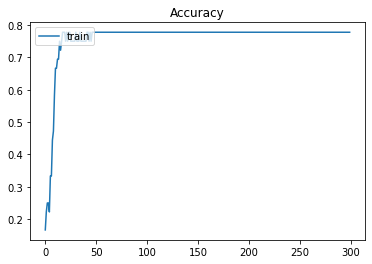

In [12]:
import pickle
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os


# 分類するラベルの数
labelToCode = pickle.load(open("text/label_to_code.pickle", "rb"))
nb_classes = len(labelToCode) 

# データベースの読込
data = pickle.load(open("text/genre.pickle", "rb"))
y = data[0] # ラベルコード
x = data[1] # TF-IDF

# ラベルデータをone-hotベクトルに直す
y = tf.keras.utils.to_categorical(y, nb_classes)
in_size = x[0].shape[0] # 入力x[0]の要素数

# 学習用とテスト用を分ける
x_train, x_test, y_train, y_test = train_test_split(
        np.array(x), np.array(y), test_size=0.2)

# モデルを読み込む
model = tf.keras.models.load_model('text/hw_model.h5')

# 既に学習済みの重みデータが存在していれば読み込む
# if os.path.exists(ml_dir + 'text/hw_weights.h5'):
#     model.load_weights(ml_dir + 'text/hw_weights.h5')

# 学習を実行
hist = model.fit(x_train, y_train,
          batch_size=25, # 1回に計算するデータ数
          epochs=300,    # 学習の繰り返し回数みたいなもの
          verbose=1,
          validation_data=(x_test, y_test))

# 評価する
score = model.evaluate(x_test, y_test, verbose=1)
print("正解率=", score[1], 'loss=', score[0])

# 重みデータを保存
model.save_weights('text/hw_weights.h5')

# 学習の様子をグラフへ描画
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## 手順(7)  学習（MLP）モデルを実行して、判定

In [28]:
import pickle
import tensorflow as tf
# import pandas as pd


def inverse_dict(d):
    return {v:k for k,v in d.items()}

# モデルを読み込む
model = tf.keras.models.load_model('text/hw_model.h5')
# 学習済みの重みデータを読み込む
model.load_weights('text/hw_weights.h5')
# tfidオブジェクトをファイルよりロードする
vectorizer_loaded = pickle.load(open("text/tfidf_vec.pickle", "rb"))
# ラベルの定義
labelToCode = pickle.load(open("text/label_to_code.pickle", "rb"))
label_dic = inverse_dict(labelToCode)

# テキストを指定して判定
def predCatego(text):
    # TF-IDFのベクトルに変換 
    data = vectorizer_loaded.transform([tokenize(text)]).toarray()
    # MLPで予測
    pre = model.predict(data)[0]
    sortIndexDesc = pre.argsort()[::-1];
    maxInd = sortIndexDesc[0]
    ans_sentence = label_dic[maxInd]
    predict_val = "{:.4f}".format(pre[maxInd])

    print(ans_sentence, predict_val)
    print("2番目の答え : " + label_dic[sortIndexDesc[1]], "{:.4f}".format(pre[sortIndexDesc[1]]))
    return ans_sentence, predict_val

if __name__ == '__main__':
    requestParam = """
    夏 晴れ 寒い
    """
    predCatego(requestParam)

夏です。でも、今日は少し寒いですね 0.9996
2番目の答え : 天気は[こちら](https://tenki.jp/)をご覧頂ければと思います。 0.0004


## 手順(8)  デプロイに必要な学習済みデータをダウンロード

In [29]:
! zip -r res text/
from google.colab import files
files.download('res.zip')

  adding: text/ (stored 0%)
  adding: text/label_to_code.pickle (deflated 64%)
  adding: text/hw_model.h5 (deflated 10%)
  adding: text/hw_weights.h5 (deflated 9%)
  adding: text/genre.pickle (deflated 98%)
  adding: text/tfidf_vec.pickle (deflated 53%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#その他 テストコード

In [ ]:
import requests
import json

# お勧めの曲データを取得する
# HOW_MUSIC_WORD = "中島みゆきが歌う曲で人との出会いがテーマの曲"
HOW_MUSIC_WORD = "スピッツが歌っててテーマが青春の曲を教えて"
url =f'http://52.192.175.215:8888/recommend/api/what-music/{HOW_MUSIC_WORD}'
response = requests.get(url)
response.raise_for_status()

music_data = json.loads(response.text)
w = music_data['recoMusicInfos']

recMusic = w[0]['recoMusicMoji']

print(recMusic)

空も飛べるはず


In [ ]:
import re

phone_regex = re.compile(r'\d\d\d-\d\d\d-\d\d\d')

mo = phone_regex.search("電話番号は123-456-789です。")

print(mo.group())


maru_phone_regex = re.compile(r'(\d\d\d)-(\d\d\d-\d\d\d)')
maru_mo = maru_phone_regex.search("電話番号は321-956-389です。")

print(maru_mo.group(1))

123-456-789
321
